In [ ]:
# Run this cell before doing the imports because of a bug in codespace
print('Run this cell before doing the imports because of a bug in codespace.')

Run this cell before doing the imports because of a bug in codespace.


In [ ]:
# If running locally and you need to install required packages for data analysis and visualization
%pip install pandas numpy scipy statsmodels matplotlib seaborn scikit-learn openpyxl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import essential libraries for data analysis, statistics, and visualization
import numpy as np  # Numerical computing
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical data visualization
from scipy import stats  # Statistical functions
import statsmodels.api as sm  # Statistical modeling
import warnings  # Warning control

# Import additional libraries for enhanced display and interactive plots
from IPython.display import Markdown, display  # Rich text display in notebooks
import plotly.express as px  # Interactive plotting

# Suppress warnings to keep output clean
warnings.filterwarnings("ignore")

# Set default plot parameters for better readability
plt.rcParams["figure.figsize"] = (13, 8)  # Larger figure size
plt.rcParams["axes.grid"] = True  # Show grid lines for easier reading

## 1) Load Data

In [ ]:
# Load the social media posts dataset from CSV file
df = pd.read_csv('data/social_media_posts.csv')
# Display the first 5 rows to get an initial look at the data structure
df.head()

,post_id,user_id,post_time,post_hour,post_type,paid_boost,hashtags_count,followers_at_post,views,likes,clicks,comments,shares,watch_time_total_sec,like_rate,click_through_rate,comment_rate,session_time_normal,clicks_binomial
0,1,186,2025-06-12 03:23:46.951695,3,text,0,0,22828,23112,198,96,35,15,10889,0.008567,0.004154,0.001514,32.483571,4
1,2,273,2025-07-27 10:40:21.951695,10,image,0,5,4459,2893,148,29,5,6,1835,0.051158,0.010024,0.001728,29.308678,6
2,3,80,2025-08-25 13:23:31.951695,13,video,0,2,3607,5644,285,56,0,17,149281,0.050496,0.009922,0.000000,33.238443,2
3,4,310,2025-08-16 12:44:40.951695,12,link,0,3,27786,10885,164,135,17,3,1236,0.015067,0.012402,0.001562,37.615149,6
4,5,131,2025-06-27 09:38:41.951695,9,video,0,4,3328,2974,163,58,0,8,193917,0.054808,0.019502,0.000000,28.829233,3


### 1.1 Sanity checks
Quick look at shape, types, missingness, and a preview.

In [ ]:
# Check the dimensions of the dataset (rows, columns) and data types of each column
df.shape, df.dtypes

((3000, 19),
 post_id                   int64
 user_id                   int64
 post_time                object
 post_hour                 int64
 post_type                object
 paid_boost                int64
 hashtags_count            int64
 followers_at_post         int64
 views                     int64
 likes                     int64
 clicks                    int64
 comments                  int64
 shares                    int64
 watch_time_total_sec      int64
 like_rate               float64
 click_through_rate      float64
 comment_rate            float64
 session_time_normal     float64
 clicks_binomial           int64
 dtype: object)

In [ ]:
# Calculate the proportion of missing values (NaN) for each column
df.isna().mean()

post_id                 0.0
user_id                 0.0
post_time               0.0
post_hour               0.0
post_type               0.0
paid_boost              0.0
hashtags_count          0.0
followers_at_post       0.0
views                   0.0
likes                   0.0
clicks                  0.0
comments                0.0
shares                  0.0
watch_time_total_sec    0.0
like_rate               0.0
click_through_rate      0.0
comment_rate            0.0
session_time_normal     0.0
clicks_binomial         0.0
dtype: float64

## 2) Descriptive Statistics
### Measure of Central Tendency
- Mode: most frequent value
- Median: middle value, less sensitive to outliars
- Mean: average value (sum of all value / number of values), more sensitive to outliars
### Measure of Spread
- Variance/Standard deviation: average of the distance values are from the mean, higher the variance/std the more spread out, more sensitive to outliars
- Percentile/Quartiles: division of values into equal parts, less sensitive to outliars



**Tasks**
- Compute mean, median, std for `revenue`, `sessions`, `purchases`.
- Compare distributions across `region` or `group`.
- Visualize skew/outliers.

> *Why?* Before modeling, understand the data's center and spread and where outliers live.

In [ ]:
# Calculate descriptive statistics for the 'comments' column
# FINDING THE MEAN

# Calculate mean (average) and round to 2 decimal places
the_mean = df['comments'].mean().round(2)
# Calculate median (middle value when sorted)
the_median = df['comments'].median()
# Calculate mode (most frequent value) - take first value if multiple modes
the_mode = df['comments'].mode()[0]
# Calculate standard deviation (measure of spread)
the_std = df['comments'].std()

# Display the calculated statistics
print('the mean', the_mean)
print('the median', the_median)
print('the mode', the_mode)
print('The Standard Deviation', the_std)

the mean 13.13
the median 0.0
the mode 0
The Standard Deviation 41.738459844995475


<Axes: >

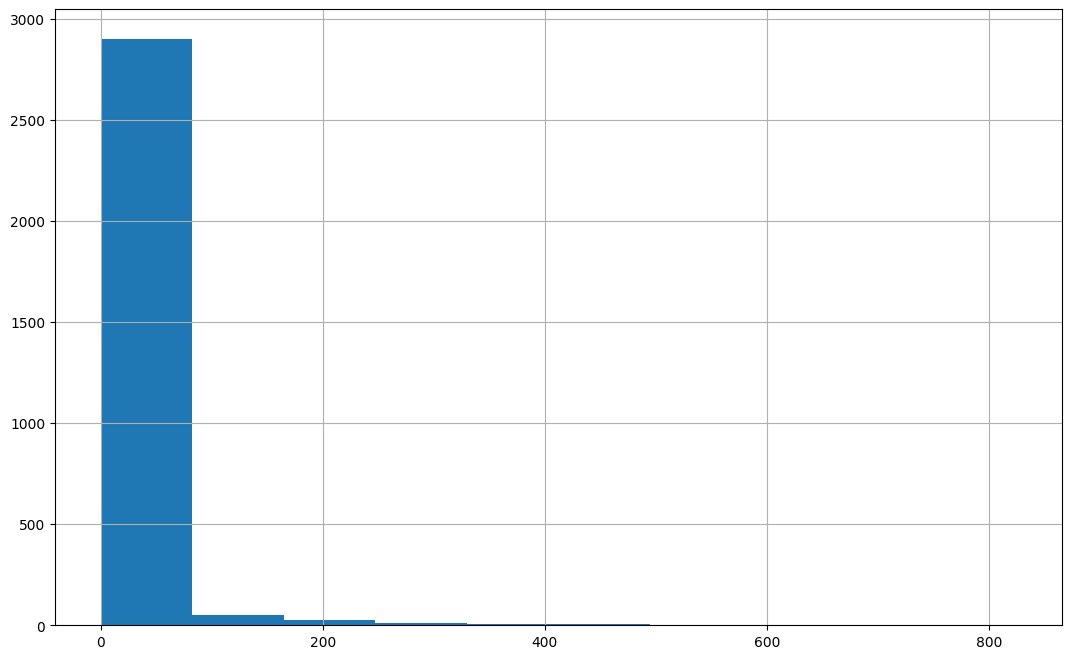

In [ ]:
# Create a histogram to visualize the distribution of comments
df['comments'].hist()

In [ ]:
# Define a function to create interactive histograms with statistical markers
def plot_histos(df, column='likes', title='title'):
    # Remove rows with missing values in the specified column
    df = df.dropna(subset=column)
    # Calculate key statistical measures
    mean_val = df[column].mean()  # Average value
    mode_val = df[column].mode()[0]  # Most frequent value
    median_val = df[column].median()  # Middle value

    # Create interactive histogram using plotly
    fig = px.histogram(df, x=column, template='plotly_dark', color_discrete_sequence=['#00CC96'], 
                       barmode='overlay',
                       title=title)

    # Add vertical line for mean with cyan color and dashed style
    fig.add_vline(x=mean_val, line_width=2, line_dash="dash", line_color="cyan",
                    annotation_text=f"Mean: {mean_val:.2f}", annotation_position="top right")
        
    # Add vertical line for mode with pink color and dashed style
    fig.add_vline(x=mode_val, line_dash="dash", line_color="pink",
                    annotation_text=f"Mode: {mode_val:.2f}", annotation_position="top left")
        
    # Add vertical line for median with yellow color and dashed style
    fig.add_vline(x=median_val, line_dash="dash", line_color="yellow", 
                    annotation_text=f"Median: {median_val:.2f}", annotation_position="bottom left")
    fig.show()
    # Display summary statistics in markdown format
    display(Markdown(f"**{column}:** mean={mean_val:.2f}, median={median_val:.2f}, mode={mode_val}. "))

# Create histograms for comments and session time with statistical overlays
plot_histos(df, 'comments', title='distribution of comments')
plot_histos(df, 'session_time_normal', title='Distribution of session time (time spent in one session in secods)')

**comments:** mean=13.13, median=0.00, mode=0. 

**session_time_normal:** mean=30.16, median=30.12, mode=13.793663299654638. 

In [14]:
df.head()

,post_id,user_id,post_time,post_hour,post_type,paid_boost,hashtags_count,followers_at_post,views,likes,clicks,comments,shares,watch_time_total_sec,like_rate,click_through_rate,comment_rate,session_time_normal,clicks_binomial
0,1,186,2025-06-12 03:23:46.951695,3,text,0,0,22828,23112,198,96,35,15,10889,0.008567,0.004154,0.001514,32.483571,4
1,2,273,2025-07-27 10:40:21.951695,10,image,0,5,4459,2893,148,29,5,6,1835,0.051158,0.010024,0.001728,29.308678,6
2,3,80,2025-08-25 13:23:31.951695,13,video,0,2,3607,5644,285,56,0,17,149281,0.050496,0.009922,0.000000,33.238443,2
3,4,310,2025-08-16 12:44:40.951695,12,link,0,3,27786,10885,164,135,17,3,1236,0.015067,0.012402,0.001562,37.615149,6
4,5,131,2025-06-27 09:38:41.951695,9,video,0,4,3328,2974,163,58,0,8,193917,0.054808,0.019502,0.000000,28.829233,3


In [ ]:
# Select specific metrics for detailed statistical analysis
metrics = ["post_hour", "followers_at_post", "views"]
# Generate comprehensive descriptive statistics including custom percentiles
desc = df[metrics].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]).T
# Display the transposed statistics table for better readability
desc


,count,mean,std,min,25%,50%,75%,90%,95%,max
post_hour,3000.0,11.535667,6.933500,0.0,5.75,12.0,17.00,21.0,22.00,23.0
followers_at_post,3000.0,8140.370333,10840.673985,377.0,2553.75,4976.0,9275.00,18019.0,27467.00,90568.0
views,3000.0,11301.972333,20531.608058,62.0,1963.50,4981.5,11819.25,26784.7,41857.05,310672.0


## 3) Distributions in Practice
### Types of Distributions
#### Normal Distribution
- Bell curve, symmetrical, "peak" of the curve is the mean, median, and mode
- If nature had a default setting, it would be the normal distribution
- **Central Limit Theoreom** tldr: If you take enough samples of something, the distribution of the means will be normal
    - This means if the more samples/data we have, the closer our sample distribution will be to the true population mean
    - More samples = More accurate numbers
#### Binomial Distribution
- Yes/No machine, mainly counting the frequency of yes
- Probability of a yes
#### Poisson Distribution
- Probability that some event will happen within a given amount of time(or space)
- Ex: Number of natural disasters happening in the next 6 months, Number of calls a call center recieves in the next 30 minutes



**Tasks**
- Treat `purchases` as count data (Poisson-ish). Plot its distribution.
- Explore `sessions` distribution; check if long-tailed.
- (Optional) CLT demo: sample means of `revenue`.

> *Why?* Picking reasonable distributional assumptions clarifies which tests and intervals are valid.

In [ ]:

# # (Optional) CLT demo: sample means of revenue
# rng = np.random.default_rng(0)
# means = [rng.choice(df["revenue"].values, size=200, replace=True).mean() for _ in range(2000)]
# fig, ax = plt.subplots()
# ax.hist(means, bins=40)
# ax.set_title("Sampling Distribution of Mean Revenue (Bootstrap/CLT intuition)")
# plt.show()

## 4) Sampling & Confidence Intervals
### **Sampling**
Sampling is selecting a portion of a larger group, called a population, to study instead of collecting data from every individual
#### Random Sampling
Like drawing names from a hat, every person has equal chance of being picked.
- You want this when your goal is to make inferences about the larger population―a.k.a. generalizability.
- You do not want this when you need specialists (e.g., “How DS use Python”).
- Random sampling can be extremely time-consuming and/or expensive. That’s why researchers can fall into the trap of accidental biased sampling!
#### Biased Sampling
Those with particular traits are picked but we want to make predictions of the *whole* population, not just the ones with a particular trait.
- Convenience Bias: Sampling based on participant availability or accessibility.
    - Only calling people during daytime hours (misses working professionals)
- Self Selection Bias: When voluntary responses are due to surveyees having strong opinions.
    - Reviews on yelp where customers are mostly upset or mostly really satisfied with their service (misses customers without strong opinion)
- Survivor Bias: Sample focuses only on those who passed a certain selection process while ignoring those who did not
    - Bill Gates, Steve Jobs, and Mark Zuckerberg dropped out of college and became wildly successful to make a conclusion of the impact of college/dropping out (misses out on majority of cases where a person did not become extremely successful after dropping out of college)
### Confidence Interval
It tells you something like: “we're 95% sure the true answer is somewhere in this range.”
A wider interval mean more uncertainty. A narrower interval means more precision.
#### Margin of Error
This is the “plus-or-minus reality check” or ±3% you see in every poll.
They are like the error radius on your GPS. The more satellites your phone can get a signal from, the smaller its error radius is when showing you your location.
Confidence Interval = 2x Margin of Error



### Bootstrapping
Most of the time, we cannot get multiple samples of our population. Instead, we bootstrap. Bootstrapping is when we have one sample/set of data, and we randomly sample the same data multiple times and examen the means and variance of our bootstrapped samples.

**Task**
- Build a 95% CI for mean `revenue`. Repeat per `region`.

> *Why?* Quantify uncertainty around your estimates.

In [ ]:
# Load ecommerce sales data for bootstrap analysis
df = pd.read_csv('data/ecommerce_sales.csv')

# Define function to demonstrate Central Limit Theorem through bootstrapping
def bootstrap_CLT(input_df, column, sample_size=100, trials=1000):
    # Initialize list to store sample means
    sample_means = []
    # Perform bootstrap sampling: repeatedly sample with replacement
    for i in range(trials):
        # Take a random sample of specified size with replacement
        our_sample = input_df[column].sample(sample_size, replace=True)
        # Calculate mean of this bootstrap sample
        sample_mean = our_sample.mean()
        # Store the sample mean
        sample_means.append(sample_mean)
    
    # Create histogram of bootstrap sample means to show CLT in action
    fig = px.histogram(sample_means)
    fig.show()

# Apply bootstrap analysis to revenue column
bootstrap_CLT(df, 'revenue')

## 5) Hypothesis Testing
To make statements about a population, we need to hypothesis test to back a claim or assumption about our population.
### Hypothesis
#### Null Hypothesis H<sub>0<sub>
Assumes nothing interesting is happening, so if it is falsified, then something interesting is indeed happening. The status quo, the no effect.
- Average daily Netflix watch time is 2 hours. 
- Free shipping has no effect on purchase decisions.
#### Alternative Hypothesis H<sub>1<sub>
Claims something interesting is happening, so if it is proven, …then something interesting is indeed happening.
- Average daily Netflix watch time is more than 2 hours.
- Free shipping increases number of purchases.
### p-value
The p-value is the probability of seeing at least the results you have, given that the null hypothesis is true.
- If p-value low = not likely to see our results given the null hypothesis is true
    - This means we can reject null hypothesis
- If p-value high = it is likely to see our results given the null hypothesis is true
    - We cannot reject null hypothesis

Usually we set cutoff of what is a *statistically significant* p-value at 0.05.

### Types of Tests
#### T-test (Continuous)
A t-test compares means to see whether the difference between two groups are significant of continuous data.
- Ex: The average test scores of two sections are 70 and 80 and we want to see if the 10 point average difference is significant.
    - Testing test score averages
#### Chi-Squared Test (Categorical/Qualitative)
A Chi-squared test compares frequencies to see whether the difference between two categories are significant.
- Ex: You want to know if there are equal numbers of male and female turtles in a pond.
    - Testing male and female turtle counts 
- We use Chi-Squared to compare how different categories perform and to see if there is any significant difference between categories. This can help with business decisions such as seeing which group/region is doing better or needs extra attention.




We’ll compare **Group A vs Group B**.

**Tasks**
- Formulate H0/H1 about mean `revenue` (or conversion rate if you have a binary column).
- Use a **two-sample t‑test** on `revenue`. Interpret p‑value.
- (Optional) For categorical outcomes, use **chi-square**.

> *Why?* This is the backbone of A/B testing.

In [ ]:
# Import necessary libraries for statistical analysis and visualization
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
from scipy import stats  # Statistical functions

import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical visualization

# Set random seed for reproducible results
np.random.seed(69)

# Generate synthetic revenue data for A/B testing simulation
# Control group: normal distribution with mean=50, std=10
control = np.random.normal(loc=50, scale=10, size=100)   
# Treatment group: normal distribution with mean=54, std=10 (slightly higher mean)
treatment = np.random.normal(loc=54, scale=10, size=100) 

# Combine data into a structured DataFrame for analysis
df = pd.DataFrame({
    'group': ['control'] * 100 + ['treatment'] * 100,  # Group labels
    'revenue': np.concatenate([control, treatment])  # Combined revenue data
})

# Preview a random sample of the data to verify structure
df.sample(10)


,group,revenue
120,treatment,34.266081
39,control,48.097669
131,treatment,49.290140
31,control,65.917631
17,control,30.528767
71,control,48.421235
152,treatment,51.104032
14,control,36.711592
128,treatment,61.919157
7,control,60.562991


In [ ]:
# Split the data into control and treatment groups for comparison
control_rev = df[df['group'] == 'control']['revenue']  # Extract control group revenue
treatment_rev = df[df['group'] == 'treatment']['revenue']  # Extract treatment group revenue

# Perform independent two-sample t-test (Welch's t-test with unequal variances)
t_stat, p_val = stats.ttest_ind(treatment_rev, control_rev, equal_var=False)

# Display the test results
print(f"T-statistic: {t_stat:.2f}")  # Test statistic (how many standard errors apart)
print(f"P-value: {p_val:.5f}")  # Probability of observing this difference by chance

# Statistical interpretation based on significance level
alpha = 0.05  # 5% significance level (standard threshold)
if p_val < alpha:
    print("The difference is statistically significant — the new feature increased revenue!")
else:
    print("The difference is not statistically significant — no evidence the feature changed revenue.")



T-statistic: 2.66
P-value: 0.00854
The difference is statistically significant — the new feature increased revenue!


| Concept                           | Explanation                                                         |
| --------------------------------- | ------------------------------------------------------------------- |
| **Null Hypothesis (H₀)**          | The new feature does **not** change revenue.                        |
| **Alternative Hypothesis (H₁)**   | The new feature **does** change revenue.                            |
| **t-statistic**                   | Measures how many standard errors apart the group means are.        |
| **p-value**                       | Probability of seeing this difference (or larger) if H₀ were true.  |
| **Significance level (α = 0.05)** | If `p < 0.05`, we reject H₀ and conclude the feature had an effect. |


In [ ]:
# Calculate business impact metrics for the A/B test
# Calculate group averages
control_mean = control_rev.mean()  # Average revenue for control group
treatment_mean = treatment_rev.mean()  # Average revenue for treatment group

# Calculate the difference and percent increase
absolute_increase = treatment_mean - control_mean  # Dollar difference
percent_increase = (absolute_increase / control_mean) * 100  # Percentage change

# Display the business metrics
print(f"Average Revenue (Control): ${control_mean:.2f}")
print(f"Average Revenue (Treatment): ${treatment_mean:.2f}")
print(f"Absolute Increase: ${absolute_increase:.2f}")
print(f"Percent Increase: {percent_increase:.1f}%")

# Provide business interpretation of the results
print("\n--- Interpretation ---")
if percent_increase > 0:
    print(f"The new feature increased average revenue by {percent_increase:.1f}% per user.")
else:
    print(f"The new feature decreased average revenue by {abs(percent_increase):.1f}% per user.")


Average Revenue (Control): $49.62
Average Revenue (Treatment): $53.72
Absolute Increase: $4.11
Percent Increase: 8.3%

--- Interpretation ---
The new feature increased average revenue by 8.3% per user.


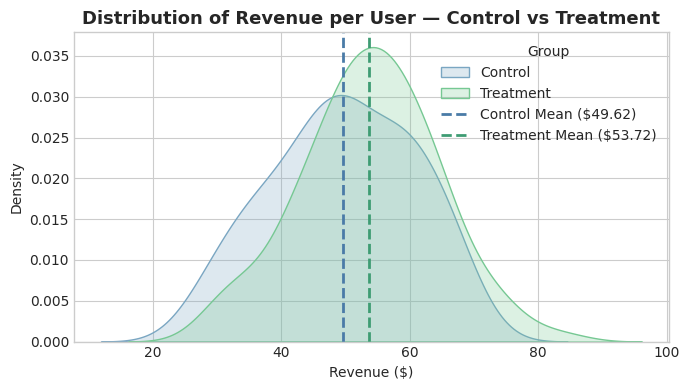

In [ ]:

# Create visualization comparing revenue distributions between groups
# Calculate means for reference lines
control_mean = np.mean(control_rev)  # Control group average
treat_mean = np.mean(treatment_rev)  # Treatment group average

# Set up the plot with seaborn style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(7,4))

# Create density plots (kernel density estimation) for each group
sns.kdeplot(control_rev, fill=True, label='Control', color='#7aa6c2')  # Blue for control
sns.kdeplot(treatment_rev, fill=True, label='Treatment', color='#76c893')  # Green for treatment

# Add vertical lines to mark the means for easy comparison
plt.axvline(control_mean, color='#4a7ba7', linestyle='--', linewidth=2, label=f'Control Mean (${control_mean:.2f})')
plt.axvline(treat_mean, color='#3e9c73', linestyle='--', linewidth=2, label=f'Treatment Mean (${treat_mean:.2f})')

# Add titles, labels, and formatting
plt.title('Distribution of Revenue per User — Control vs Treatment', fontsize=13, weight='bold')
plt.xlabel('Revenue ($)')
plt.ylabel('Density')
plt.legend(title='Group', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## 6) Correlation & Regression

**Tasks**
- Correlation matrix for `sessions`, `ad_spend`, `purchases`, `revenue`.
- Fit **linear regression**: `revenue ~ ad_spend + sessions + C(region)`.
- Interpret coefficients in a business context (magnitude & sign, not just p‑values).

> *Why?* Regression is widely used in industry for forecasting and attribution.

In [ ]:
# Load ecommerce sales data for correlation analysis
df = pd.read_csv('data/ecommerce_sales.csv')
# Select key business metrics for correlation analysis
cols = ["sessions","ad_spend","purchases","revenue"]
# Calculate correlation matrix and round to 2 decimal places for readability
corr = df[cols].corr().round(2)
# Display the correlation matrix
corr

,sessions,ad_spend,purchases,revenue
sessions,1.00,0.16,0.20,0.16
ad_spend,0.16,1.00,0.03,0.03
purchases,0.20,0.03,1.00,0.82
revenue,0.16,0.03,0.82,1.00


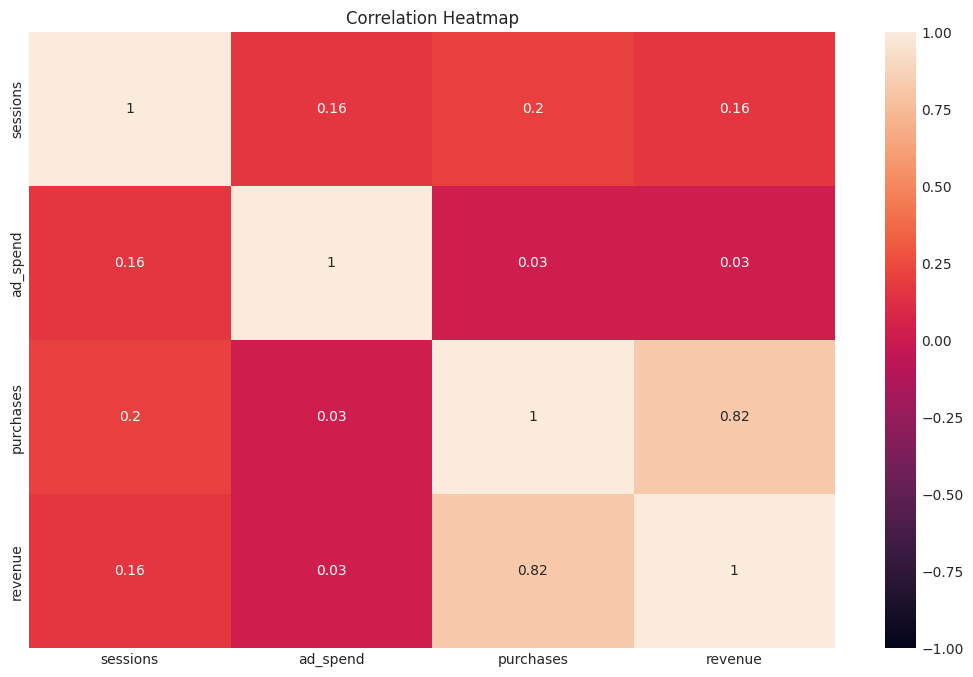

In [ ]:
# Create a heatmap visualization of the correlation matrix
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)  # Show correlation values, scale from -1 to 1
plt.title("Correlation Heatmap")
plt.show()

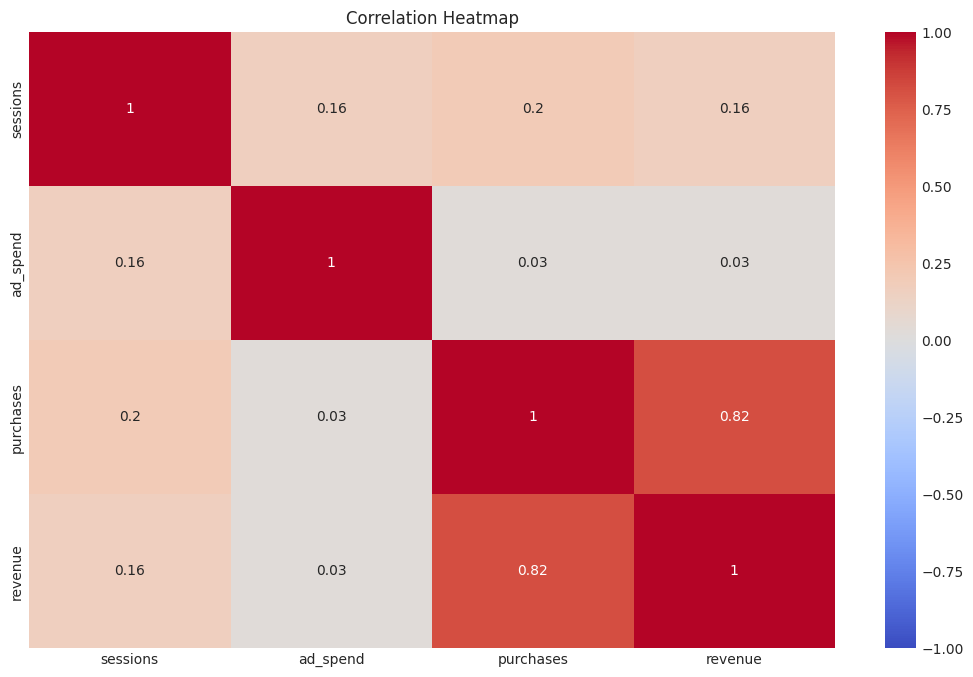

In [ ]:
# Create an enhanced heatmap with color-coded correlation values
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')  # Use coolwarm colormap for better visual distinction
plt.title("Correlation Heatmap")
plt.show()